# Algoritmo de Warshall

El algoritmo de Warshall crea una relación transitiva a partir de una relación cualquiera a partir de observar las potencias creando la cerradura transitiva $R^+$ de $R$.

In [1]:
import networkx as nx

def construct_adjacency(R, n):
    """Función para obtener la forma tabular de la relación."""
    M = []
    for i in range(0,n):
        row = []
        for j in range(0,n):
            if (i,j) in R:
                row.append(1)
            else:
                row.append(0)
        M.append(row)
        
    return M

def list_or(list):
    """Operación OR sobre elementos de lista"""
    if all(i == 0 for i in list):
        return 0
    else:
        return 1
    
def relation_from_matrix(M):
    """Recuperar relación de forma tabular"""
    relation = []
    for i,row in enumerate(M):
        for j, column in enumerate(row):
            if column == 1:
                relation.append((i,j))
                
    return relation

def check_transitivity(R):
    """Revisa si una relación (conjunto de pares ordenados) es transitiva"""
    t = True
    for (i,j) in R:
        for (k,l) in R:
            if j == k:
                if (i,l) not in R:
                    t = False
                    break
                else:
                    pass
    
    if t:
        print('La relación es transitiva')
    else:
        print('La relacion no es transitiva')

## Algoritmo de Warshall

El algoritmo de Warshall construye la cerradura transitiva a partir de una relación $R$, para esto se basa en construir una matriz $C$ que es la forma tabular de la relación $R^+$ y que está determinada como:

$$c_{i,j}^l = \begin{cases} c_{i,j}^{l-1} \lor \Big( \bigvee_{k=1}^n (c_{i,k}^{l-1} \land a_{k,j}) \Big)  & \text{si } l >1 \\ a_{i,j} & \text{si } l=1\end{cases}$$

In [2]:
def warshall(R, n):
    """Algoritmo de Warshall"""
    #Matriz de adyacencia de R
    M = construct_adjacency(R,n)
    #Nueva matriz
    C = M.copy()
    #Copia de matriz
    CP = C.copy()
    #Acumulador por elemenots
    numlt = 1
    #Determina si hubo cambio
    bCambio = True
    #Mientras numlt sean menor o igual al número de elementos
    while numlt <= n and bCambio:
        #Recorre renglones
        for i in range(0, n):
            #Recorre columnas
            for j in range(0, n):
                #Agrega 1 en la entrada CP_i,j si C_i,k y C_k,j están en la relación
                CP[i][j] = C[i][j] or list_or( [C[i][k] and M[k][j] for k in range(0,len(M))] )
                #Determina si hubo un cambio
                bCambio = (CP[i][j] != C[i][j])
        #Aumenta numlt
        numlt += 1    
        #Asigna la nueva matriz
        C = CP
        
    return C

Definimos una relación no transitiva:

La relacion no es transitiva


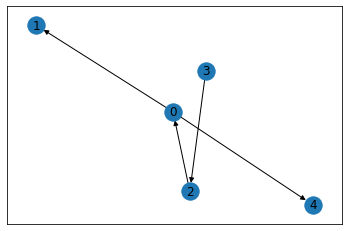

In [3]:
#Relación no transitiva
R1 = [(0,1),(1,1),(2,0),(3,2),(0,4)]
#Revisamos que en efecto no es transitiva
check_transitivity(R1)

#Dibujar gráfica
G = nx.DiGraph()
G.add_edges_from(R1)
layouts = nx.spring_layout(G)
nx.draw_networkx(G, with_labels=True, pos=layouts)

Creamos la relación transitiva con el algoritmo de Warrshall:

[(0, 1), (0, 4), (1, 1), (2, 0), (2, 1), (2, 4), (3, 0), (3, 1), (3, 2), (3, 4)]
La relación es transitiva


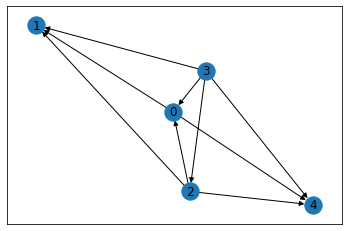

In [4]:
#Creamos la relación transitiva
tr_M1 = warshall(R1,5)
tr_R1 = relation_from_matrix(tr_M1)
print(tr_R1)
check_transitivity(tr_R1)

#Dibujamos la gráfica
Warshall_G = nx.DiGraph()
Warshall_G.add_edges_from(tr_R1)
nx.draw_networkx(Warshall_G, with_labels=True, pos=layouts)